Решение

RMSE: 46.619


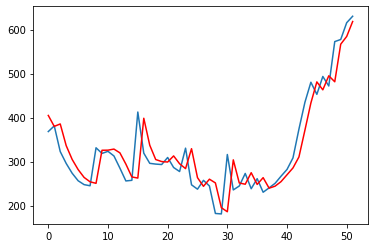

In [48]:
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
import numpy
from math import sqrt
FILE='D:\\DATA\\allBank_balance_101_sector.csv'
    
    
def predict(coef, history):
    yhat = coef[0]
    for i in range(1, len(coef)):
        yhat += coef[i] * history[-i]
    return yhat
df=pd.read_csv(FILE)
df=df[df['sector_id'].isin([1,2,3,4])]
df=df[df['bank_group_id']==1]
df=df.sort_values(by='report_date', ascending=True)
df.set_index('report_date', inplace=True)
df.index = pd.to_datetime(df.index)
df.sort_index(inplace=True)
df=df.drop(['sector_id'], axis=1)
df=df.drop(['bank_group_id'], axis=1)
df=df.drop(['value_usd'], axis=1)
df= df.resample('D').mean()
df.dropna(inplace=True)

series = df
# делим датасеты
X=df.values
size = int(len(X) * 0.65)
train, test = X[0:size], X[size:]

model = AutoReg(train, lags=2)
model_fit = model.fit()
coef = model_fit.params

history = [train[i] for i in range(len(train))]
predictions = []
for t in range(len(test)):
    yhat = predict(coef, history)
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

Неудачные решения

In [ ]:
# import sklearn
# import pandas as pd
# from math import sqrt
# import numpy as np
# import catboost
# from sklearn import linear_model
# import matplotlib as mpl
# import matplotlib.pyplot as plt

In [8]:
# df=pd.read_csv("D:\\DATA\\allBank_balance_101_sector.csv")
# df=df[df['sector_id'].isin([1,2,3,4])]
# df=df[df['bank_group_id']==1]
# df=df.sort_values(by='report_date', ascending=True)
# # df['date'] = pd.to_datetime(df['report_date'], format="%Y-%m-%d")
# # df['date']=df['report_date'].astype('datetime64[D]')
# # df['date']=range(len(df))
# df.set_index('report_date', inplace=True)
# df.index = pd.to_datetime(df.index)
# df.sort_index(inplace=True)
# df=df.drop(['sector_id'], axis=1)
# df=df.drop(['bank_group_id'], axis=1)
# df=df.drop(['value_usd'], axis=1)

# df= df.resample('D').mean()
# df.dropna(inplace=True)
# # df=df[['date','value_rub']]
# df['date']=range(len(df))

# train_data = df[:int(len(df)*0.8)]
# test_data=df[int(len(df)*0.8):]

# # train_data = train_data.resample('D').mean()
# # train_data.dropna(inplace=True)
# # train_data['date']=range(len(train_data))

# # test_data = test_data.resample('D').mean()
# # test_data.dropna(inplace=True)
# # test_data['date']=range(len(test_data))

# # df1=df[df['sector_id']==1]
# # # df1=df1[['value_rub']]

# # df2=df[df['sector_id']==2]
# # # df2=df2[['value_rub']]

# # df3=df[df['sector_id']==3]
# # # df3=df3[['value_rub']]

# # df4=df[df['sector_id']==4]
# # # df4=df4[['value_rub']]

# # train_data1x = df1[:int(len(df)*0.7)]
# # train_data1x=train_data1x.drop(['value_rub'], axis=1)
# # train_data1y = df1[:int(len(df)*0.7)]
# # train_data1y=train_data1y['value_rub']
# # test_data1x = df1[:int(len(df)*0.7)]
# # test_data1x=test_data1x.drop(['value_rub'], axis=1)
# # test_data1y = df1[:int(len(df)*0.7)]
# # test_data1y=test_data1y['value_rub']


# # train_data2 = df2[:int(len(df)*0.7)]
# # test_data2=df2[int(len(df)*0.7):]

# # train_data3 = df3[:int(len(df)*0.7)]
# # test_data3=df3[int(len(df)*0.7):]


# # train_data4 = df4[:int(len(df)*0.7)]
# # test_data4=df4[int(len(df)*0.7):]

In [43]:
# eval_dataset = catboost.Pool(test_data.drop(['value_rub'], axis=1),
#                     test_data['value_rub'])
# model=catboost.CatBoostRegressor(iterations=5000, depth=8, learning_rate=0.003, loss_function='RMSE')
# model.fit(train_data.drop(['value_rub'], axis=1), train_data['value_rub'],eval_set=eval_dataset,plot="True")
# preds = model.predict(test_data.drop(['value_rub'], axis=1))


In [44]:
# df_out=pd.DataFrame()
# df_out['real']=test_data['value_rub'].values
# df_out['predict']=preds

# df
# # df_out


In [45]:
# from sklearn import linear_model
# import matplotlib as mpl
# import matplotlib.pyplot as plt

# plt.ion()
# # train_data_=train_data.drop(['value_usd'], axis=1)
# ax = train_data.drop(['date'], axis=1).plot();
# ax.set_ylabel('Data1');
# # ax = test_data.plot();
# ax = df_out.plot();
# # ax.set_ylabel('Data2');
# # ax = train_data3.plot();
# # ax.set_ylabel('Data3');
# # ax = train_data4.plot();
# # ax.set_ylabel('Data4');


In [46]:
# from sklearn.metrics import mean_squared_log_error
# from sklearn.ensemble import RandomForestRegressor
# # from lightgbm import LGBMRegressor
# def rmse(ytrue, ypred):
#     return np.sqrt(mean_squared_log_error(ytrue, ypred))

# mdl = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=0)
# mdl.fit(train_data1x, train_data1y)
# p = mdl.predict(test_data1x)
# mean_error = []
# error = rmse(test_data1y, p)
# mean_error.append(error)
# print('Mean Error = %.5f' % np.mean(mean_error))

In [47]:
# import pandas as pd
# from pandas import read_csv
# from matplotlib import pyplot
# from statsmodels.tsa.ar_model import AutoReg
# from sklearn.metrics import mean_squared_error
# import numpy
# from math import sqrt
 
# def predict(coef, history):
#     yhat = coef[0]
#     for i in range(1, len(coef)):
#         yhat += coef[i] * history[-i]
#     return yhat
# df=pd.read_csv("D:\\DATA\\allBank_balance_101_sector.csv")
# df=df[df['sector_id'].isin([1,2,3,4])]
# df=df[df['bank_group_id']==1]
# df=df.sort_values(by='report_date', ascending=True)
# df.set_index('report_date', inplace=True)
# df.index = pd.to_datetime(df.index)
# df.sort_index(inplace=True)
# df=df.drop(['sector_id'], axis=1)
# df=df.drop(['bank_group_id'], axis=1)
# df=df.drop(['value_usd'], axis=1)
# df= df.resample('D').mean()
# df.dropna(inplace=True)

# series = df
# # делим датасеты
# X=df.values
# size = int(len(X) * 0.65)
# train, test = X[0:size], X[size:]

# model = AutoReg(train, lags=2)
# model_fit = model.fit()
# coef = model_fit.params

# history = [train[i] for i in range(len(train))]
# predictions = []
# for t in range(len(test)):
#     yhat = predict(coef, history)
#     obs = test[t]
#     predictions.append(yhat)
#     history.append(obs)
# rmse = sqrt(mean_squared_error(test, predictions))
# print('RMSE: %.3f' % rmse)
# pyplot.plot(test)
# pyplot.plot(predictions, color='red')
# pyplot.show()